In [2]:
#libraries
import pandas as pd
import pandas_profiling
import numpy as np

In [3]:
import matplotlib.pyplot as plt
#plt.style.use('dark_background')

import seaborn as sns
sns.set_palette("Paired")
sns.set_style("darkgrid")

%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px
# fig.layout.template = "plotly_dark"
import plotly.io as pio
pio.templates.default = "plotly_dark"
#plotly
from plotly.subplots import make_subplots
from matplotlib import ticker 

In [4]:
import geopandas as gdp
from shapely.geometry import Point, Polygon
import descartes
import country_converter as coco
from opencage.geocoder import OpenCageGeocode
from pprint import pprint

In [5]:
import folium
import branca
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
#import json, requests
import calmap

In [7]:
df=pd.read_csv("corona_viz.csv")

In [6]:
df.head()

,ObservationDate,Country,Continent,Confirmed,Deaths,Recovered,latitude,longitude,Active Cases,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Net migration,GDP ($ per capita)
0,2020-01-22,China,Asia,547.0,17.0,28.0,35.861660,104.195397,502.0,1.313974e+09,9596960.0,"136,9","-0,4",5000.0
1,2020-01-22,Hong Kong,Asia,0.0,0.0,0.0,22.396428,114.109497,0.0,6.940432e+06,1092.0,"6355,7","5,24",28800.0
2,2020-01-22,Japan,Asia,2.0,0.0,0.0,36.204824,138.252924,2.0,1.274636e+08,377835.0,"337,4",0,28200.0
3,2020-01-22,Macao,Asia,1.0,0.0,0.0,22.198745,113.543873,1.0,4.531250e+05,28.0,"16183,0","4,86",19400.0
4,2020-01-22,South Korea,Asia,1.0,0.0,0.0,35.907757,127.766922,1.0,4.884682e+07,98480.0,"496,0",0,17800.0


In [7]:
df.columns

Index(['ObservationDate', 'Country', 'Continent', 'Confirmed', 'Deaths',
       'Recovered', 'latitude', 'longitude', 'Active Cases', 'Population',
       'Area (sq. mi.)', 'Pop. Density (per sq. mi.)', 'Net migration',
       'GDP ($ per capita)', 'Deathrate'],
      dtype='object')

# WW Analysis

In [97]:
formated_gdf = df.groupby(['ObservationDate', 'Country'])['Confirmed', 'Deaths'].max()
formated_gdf = formated_gdf.reset_index()
formated_gdf['ObservationDate'] = pd.to_datetime(formated_gdf['ObservationDate'])
formated_gdf['ObservationDate'] = formated_gdf['ObservationDate'].dt.strftime('%m/%d/%Y')
formated_gdf['size'] = formated_gdf['Confirmed'].pow(0.3)

fig = px.scatter_geo(formated_gdf, locations="Country", locationmode='country names', 
                     color="Confirmed", size='size', hover_name="Country", 
                     range_color= [0, 1500], 
                     projection="natural earth", animation_frame="ObservationDate", 
                     title='COVID-19: Confirmed cases Over Time', color_continuous_scale="GnBu")
# fig.update(layout_coloraxis_showscale=False)
fig.show()

In [98]:
formated_gdf = df.groupby(['ObservationDate', 'Country'])['Confirmed', 'Deaths'].max()
formated_gdf = formated_gdf.reset_index()
formated_gdf['ObservationDate'] = pd.to_datetime(formated_gdf['ObservationDate'])
formated_gdf['ObservationDate'] = formated_gdf['ObservationDate'].dt.strftime('%m/%d/%Y')
formated_gdf['size'] = formated_gdf['Deaths'].pow(0.3)

fig = px.scatter_geo(formated_gdf, locations="Country", locationmode='country names', 
                     color="Deaths", size='size', hover_name="Country", 
                     range_color= [0, 100], 
                     projection="natural earth", animation_frame="ObservationDate", 
                     title='COVID-19: Deaths Over Time', color_continuous_scale="peach")
# fig.update(layout_coloraxis_showscale=False)
fig.show()

In [119]:
grouped = df.groupby('ObservationDate')['ObservationDate', 'Confirmed', 'Deaths', 'Active Cases', 'Recovered'].sum().reset_index()

fig = px.line(grouped, x="ObservationDate", y="Confirmed", 
              title="Worldwide Confirmed Cases Over Time")
fig.show()

fig = px.line(grouped, x="ObservationDate", y="Confirmed", 
              title="Worldwide Confirmed Cases (Logarithmic Scale) Over Time", 
              log_y=True)
fig.show()

In [120]:
# Conversion for Calender
df["ObservationDate"]=pd.to_datetime(df["ObservationDate"])

/usr/local/anaconda3/lib/python3.7/site-packages/calmap/__init__.py:221: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



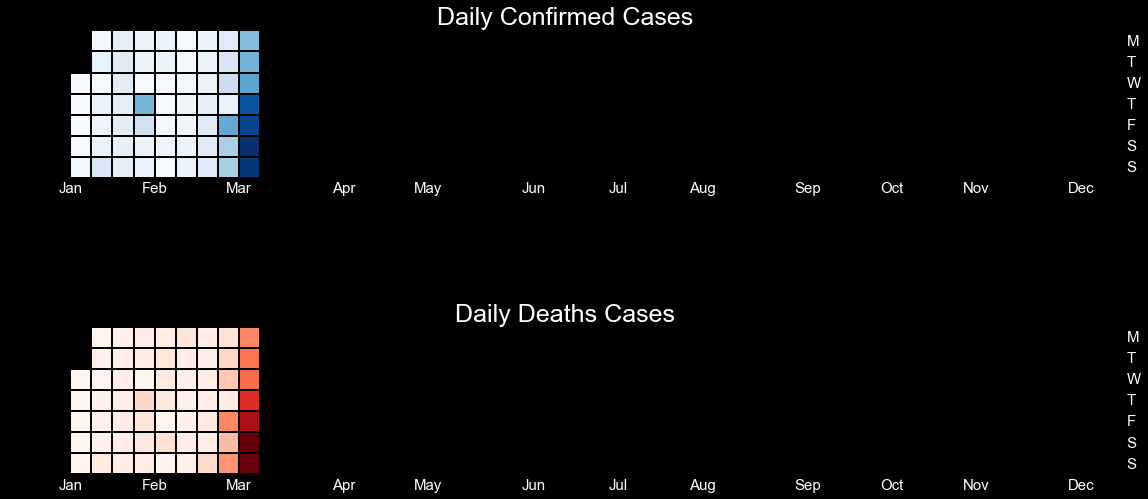

In [121]:
# Calender Map
plt.style.use('dark_background')
f = plt.figure(figsize=(20,10))
f.add_subplot(2,1,1)

calmap.yearplot(df.groupby('ObservationDate')['Confirmed'].sum().diff(), fillcolor='black', cmap='Blues', daylabels='MTWTFSS', linewidth=1, linecolor="#000000",year=2020,)
plt.title("Daily Confirmed Cases",fontsize=25)
plt.tick_params(labelsize=15)

f.add_subplot(2,1,2)
calmap.yearplot(df.groupby('ObservationDate')['Deaths'].sum().diff(), fillcolor='black', cmap='Reds', daylabels='MTWTFSS', linewidth=1,linecolor="#000000",year=2020,)
plt.title("Daily Deaths Cases",fontsize=25)
plt.tick_params(labelsize=15)
plt.show()

In [122]:
#heat map
temp = df[[col for col in df.columns]]
latest = temp[temp['ObservationDate'] == max(temp['ObservationDate'])].reset_index()
latest_grouped = latest.groupby('Country')['Confirmed', 'Deaths', 'Active Cases', 'Recovered'].sum().reset_index()

In [123]:
fig = px.choropleth(latest_grouped, locations="Country", 
                    locationmode='country names', color="Confirmed", 
                    hover_name="Country", range_color=[1,5000], 
                    color_continuous_scale="GnBu", 
                    title='Countries with Confirmed Cases')
# fig.update(layout_coloraxis_showscale=False)
fig.show()

In [124]:
# Confirmed Cases WW on the last day of our DS
fig = px.bar(latest_grouped.sort_values('Confirmed', ascending=False)[:20][::-1], 
             x='Confirmed', y='Country', color_discrete_sequence=['#05eeff'],
             title='Confirmed Cases Worldwide', text='Confirmed', height=1000, orientation='h')
fig.show()

In [125]:
#Include INTERACTION
fig = px.bar(latest_grouped.sort_values('Active Cases', ascending=False)[:20][::-1], 
             x='Active Cases', y='Country', color_discrete_sequence=['#ff9119'],
             title='Active Cases Worldwide', text='Confirmed', height=1000, orientation='h')
fig.show()

In [126]:
temp = df.groupby('ObservationDate')['Recovered', 'Deaths', 'Confirmed', "Active Cases"].sum().reset_index()
temp = temp.melt(id_vars="ObservationDate", value_vars=['Recovered', 'Deaths', "Active Cases", 'Confirmed'],
                 var_name='case', value_name='count')


#fig = px.line(temp, x="ObservationDate", y="count", color='case',
#             title='Cases over time: Line Plot', color_discrete_sequence = ['#fe1f4e', '#05eeff', "#34fd50"])
#fig.show()


fig = px.area(temp, x="ObservationDate", y="count", color='case',
             title='Cases over time:', color_discrete_sequence = ["#34fd50",'#fe1f4e',"#ff9119",'#05eeff'])
fig.show()

In [127]:
temp = df.groupby('ObservationDate')['Deaths', 'Active Cases'].sum().reset_index()
temp = temp.melt(id_vars="ObservationDate", value_vars=['Deaths', 'Active Cases'],
                 var_name='case', value_name='count')


fig = px.line(temp, x="ObservationDate", y="count", color='case',
             title='Cases over time: Line Plot', color_discrete_sequence = ['#ff9119','#fe1f4e'])
#fig.show()


fig = px.area(temp, x="ObservationDate", y="count", color='case',
             title='Cases over time: Deaths vs Active', color_discrete_sequence = ['#fe1f4e', '#ff9119'])
fig.show()

In [128]:
temp = df.groupby('ObservationDate')['Confirmed', 'Active Cases'].sum().reset_index()
temp = temp.melt(id_vars="ObservationDate", value_vars=['Confirmed', 'Active Cases'],
                 var_name='case', value_name='count')


fig = px.line(temp, x="ObservationDate", y="count", color='case',
             title='Cases over time: Line Plot', color_discrete_sequence = ['cyan', 'red', 'orange'])
#fig.show()


fig = px.area(temp, x="ObservationDate", y="count", color='case',
             title='Cases over time: Confirmed vs Active', color_discrete_sequence = ['#05eeff','#ff9119'])
fig.show()

#### Grouped = WW info by dates
#### latest_grouped = WW by Country

# Continent Level

In [129]:
# Creation of df for Continents
grouped_Europe = df[df['Continent'] == "Europe"].reset_index()
grouped_Europe_date = grouped_Europe.groupby('ObservationDate')['ObservationDate','Confirmed', 'Deaths', 'Active Cases', 'Recovered'].sum().reset_index()
tempE = grouped_Europe_date.melt(id_vars="ObservationDate", value_vars=['Deaths', 'Confirmed', "Recovered", "Active Cases"],
                 var_name='case', value_name='count')

grouped_Asia = df[df['Continent'] == "Asia"].reset_index()
grouped_Asia_date = grouped_Asia.groupby('ObservationDate')['ObservationDate','Confirmed', 'Deaths', 'Active Cases', 'Recovered'].sum().reset_index()
tempAs = grouped_Asia_date.melt(id_vars="ObservationDate", value_vars=['Deaths', 'Confirmed', "Recovered", "Active Cases"],
                 var_name='case', value_name='count')

grouped_America = df[df['Continent'] == "America"].reset_index()
grouped_America_date = grouped_America.groupby('ObservationDate')['ObservationDate','Confirmed', 'Deaths', 'Active Cases', 'Recovered'].sum().reset_index()
tempAm = grouped_America_date.melt(id_vars="ObservationDate", value_vars=['Deaths', 'Confirmed', "Recovered", "Active Cases"],
                 var_name='case', value_name='count')

grouped_Africa = df[df['Continent'] == "Africa"].reset_index()
grouped_Africa_date = grouped_Africa.groupby('ObservationDate')['ObservationDate','Confirmed', 'Deaths', 'Active Cases', 'Recovered'].sum().reset_index()
tempAf = grouped_Africa_date.melt(id_vars="ObservationDate", value_vars=['Deaths', 'Confirmed', "Recovered", "Active Cases"],
                 var_name='case', value_name='count')

#### grouped_"Continent"_date = by obs date for each country

In [130]:
temp2 = df[[col for col in df.columns]]
latest2 = temp2[temp2['ObservationDate'] == max(temp2['ObservationDate'])].reset_index()
ww_cont_count = latest2.groupby(["Continent", "Country"])['ObservationDate','Confirmed', 'Deaths', 'Active Cases'].sum().reset_index()
top_ww = ww_cont_count.sort_values('Confirmed', ascending=False)[:20][::-1]
#top_ww.head(20)
# on top 20 only one case that is Oceania w 1314 confirmed and 7 deaths (so we don't include the continent in the analysis)

In [100]:
tot_continents = latest2.groupby(["Continent"])["Continent",'ObservationDate','Confirmed', 'Deaths', 'Active Cases'].sum().reset_index()

fig = go.Figure(data=[go.Table(
    header=dict(values=list(tot_continents.columns),
               line_color='white',
               fill_color='#84DCC6',
               font=dict(color='black', size=18),
               height=30,
               align='left'),
    
    cells=dict(values=[tot_continents["Continent"], tot_continents["Confirmed"], tot_continents["Deaths"], tot_continents["Active Cases"]],
               line_color='white',
               fill_color='#111111',
               font=dict(color='white', size=12),
               height=30,
               align='left'))
])

fig.show()

### Comparisons among Continents

In [131]:
plot_titles = ['Europe', 'Asia', 'America', 'Africa'] 


fig = px.line(tempE, x="ObservationDate", y="count", color='case', 
              title=f" Cases in {plot_titles[0].upper()} Over Time", 
              color_discrete_sequence = ['#fe1f4e', '#05eeff', "#34fd50",'#ff9119'],
              height=500
             )

fig.show()

fig = px.line(tempAs, x="ObservationDate", y="count", color='case', 
              title=f" Cases in {plot_titles[1].upper()} Over Time", 
              color_discrete_sequence = ['#fe1f4e', '#05eeff', "#34fd50",'#ff9119'],
              height=500
             )
fig.show()


fig = px.line(tempAm, x="ObservationDate", y="count", color='case', 
              title=f" Cases in {plot_titles[2].upper()} Over Time", 
              color_discrete_sequence = ['#fe1f4e', '#05eeff', "#34fd50",'#ff9119'],
              height=500
             )
fig.show()


In [102]:
# other way to compare continents
px.scatter(ww_cont_count.sort_values('Confirmed', ascending=False)[:15][::-1], 
           x="Deaths", y="Confirmed", color="Continent", size="Active Cases", size_max=60, 
           hover_name="Continent", facet_col="Continent", log_x=False, title="Continent's countries Cases vs Deaths", text='Country'
           )

In [103]:
fig = px.scatter(ww_cont_count.sort_values('Confirmed', ascending=False)[:15][::-1],
                x="Confirmed", y="Deaths", size='Deaths', color="Continent",
                log_x=False, log_y=False, size_max=60,
                template="plotly_dark", title="Continent's countries Cases vs Deaths", text='Country')
fig.show()


In [104]:
# Europe Country unique values creation

europe = df[df['Continent'] == "Europe"]['Country'].values
europe = set(europe)
europe = list(europe)
#europe

# Europe

In [105]:
europe_grouped_latest = latest_grouped[latest_grouped['Country'].isin(europe)]

#### europe_grouped_latest = Europe countries info

In [106]:
#Europe
formated_gdf = df.groupby(['ObservationDate', 'Country'])['Confirmed', 'Deaths', 'Recovered'].max()
formated_gdf = formated_gdf.reset_index()
formated_gdf['ObservationDate'] = pd.to_datetime(formated_gdf['ObservationDate'])
formated_gdf['ObservationDate'] = formated_gdf['ObservationDate'].dt.strftime('%m/%d/%Y')
formated_gdf['size'] = formated_gdf['Confirmed'].pow(0.3) * 5

fig = px.scatter_geo(formated_gdf, locations="Country", locationmode='country names', 
                     color="Confirmed", size='size', hover_name="Country", 
                     range_color= [0, 5000], 
                     projection="natural earth", animation_frame="ObservationDate", scope="europe",
                     title='COVID-19: Spread Over Time in EUROPE', color_continuous_scale="GnBu", height=800)
# fig.update(layout_coloraxis_showscale=False)
fig.show()

In [107]:
fig = px.choropleth(europe_grouped_latest, locations="Country", 
                    locationmode='country names', color="Confirmed", 
                    hover_name="Country", range_color=[1,2000], 
                    color_continuous_scale='portland', 
                    title='European Countries with Confirmed Cases', scope='europe', height=800)
# fig.update(layout_coloraxis_showscale=False)
fig.show()

In [108]:
fig = px.bar(europe_grouped_latest.sort_values('Confirmed', ascending=False)[:5][::-1], 
             x='Confirmed', y='Country', color_discrete_sequence=['#05eeff'],
             title='Confirmed Cases in Europe', text='Confirmed', orientation='h')
fig.show()

In [109]:
#select the 5 targeted European Countries
top5 = europe_grouped_latest.sort_values('Confirmed', ascending=False)[:5][::-1]
top5 = top5["Country"]
top5 = top5.tolist()
europe_5 = df[df['Country'].isin(top5)]


## Metrics
Mortality and Recovery Rates

In [110]:
latest = df[df['ObservationDate'] == max(df['ObservationDate'])]
flg = latest.groupby('Country')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()

flg['MortalityRate'] = round((flg['Deaths']/flg['Confirmed'])*100, 2)
flg = flg[flg['Country'].isin(top5)]
temp = flg[flg['Confirmed']>100]
temp = temp.sort_values('MortalityRate', ascending=False)

fig = px.bar(temp.sort_values(by="MortalityRate", ascending=False)[:10][::-1],
             x = 'MortalityRate', y = 'Country', color='Country', 
             title='Mortality Rate', text='MortalityRate', height=800, orientation='h',
             color_discrete_sequence=["#405d3a","#86c6be", '#c80003', "#a6c64c", "#ff955f"]
            )
fig.show()

In [111]:
flg['RecoveryRate'] = round((flg['Recovered']/flg['Confirmed'])*100, 2)
temp = flg[flg['Confirmed']>100]
temp = temp.sort_values('RecoveryRate', ascending=False)

fig = px.bar(temp.sort_values(by="RecoveryRate", ascending=False)[:10][::-1],
             x = 'RecoveryRate', y = 'Country', color='Country', 
             title='Recovery Rate', text='RecoveryRate', height=800, orientation='h',
             color_discrete_sequence=['#c80003', "#ff955f", "#86c6be", "#a6c64c", "#405d3a"]
            )
fig.show()

#### flg - target european countries w recovery and mortality rate

In [112]:
flg.head()

,Country,Confirmed,Deaths,Recovered,MortalityRate,RecoveryRate
56,France,16044.0,674.0,2200.0,4.20,13.71
61,Germany,24873.0,94.0,266.0,0.38,1.07
83,Italy,59138.0,5476.0,7024.0,9.26,11.88
150,Spain,28768.0,1772.0,2575.0,6.16,8.95
157,Switzerland,7245.0,98.0,131.0,1.35,1.81


Average Mortality Rate 4.2700000000000005
Median Mortality Rate 4.2
Average Recovery Rate 7.484
Median Recovery Rate 8.95


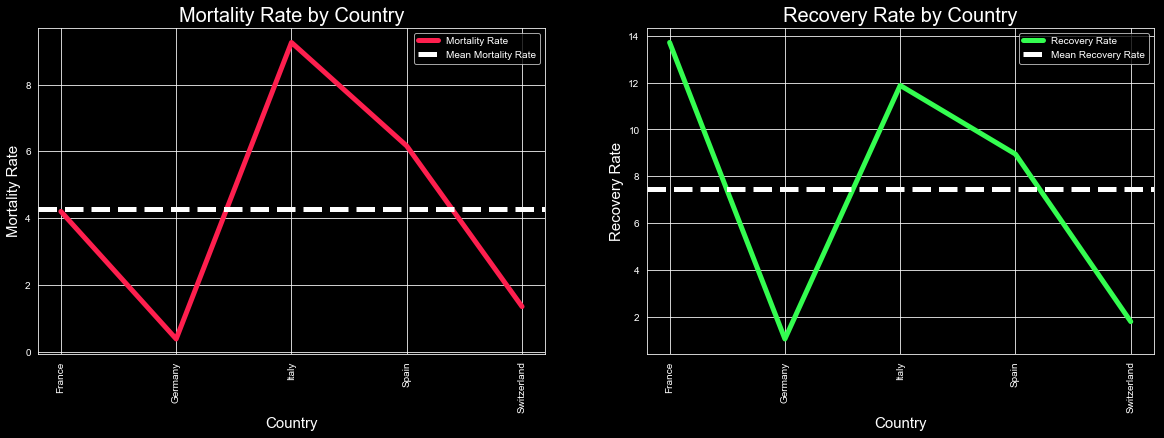

In [113]:
plt.style.use('dark_background')
#Plotting Mortality and Recovery Rate 
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,6))

## Mortality Rate
ax1.plot(flg["Country"], flg["MortalityRate"],label='Mortality Rate',linewidth=5, color ="#fe1f4e")
ax1.axhline(flg["MortalityRate"].mean(),linestyle='--',color='white',linewidth=5,label="Mean Mortality Rate")
ax1.set_ylabel("Mortality Rate", fontsize=15)
ax1.set_xlabel("Country", fontsize=15)
ax1.set_title("Mortality Rate by Country", fontsize=20)
ax1.legend()
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)

## Recovery Rate    
ax2.plot(flg["Country"], flg["RecoveryRate"], label="Recovery Rate",linewidth=5, color ="#34fd50")
ax2.axhline(flg["RecoveryRate"].mean(),linestyle='--',color='white', linewidth=5, label="Mean Recovery Rate")
ax2.set_ylabel("Recovery Rate", fontsize=15)
ax2.set_xlabel("Country", fontsize=15)
ax2.set_title("Recovery Rate by Country", fontsize=20), 
ax2.legend()
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)
    
print("Average Mortality Rate",flg["MortalityRate"].mean())
print("Median Mortality Rate",flg["MortalityRate"].median())
print("Average Recovery Rate",flg["RecoveryRate"].mean())
print("Median Recovery Rate",flg["RecoveryRate"].median())

# Other general interesting viz

In [114]:
orange = pd.read_csv("HDI-fixed-for-jhu-covid.csv")
orange.head()

,Life expectancy,Mean years of schooling,Gross national income (GNI) per capita,Gender Development Index value,Gender Development Index Group,Life expectancy at birth Female,Life expectancy at birth Male,Mean years of schooling Female,Mean years of schooling Male,Estimated gross national income per capita Female,...,Inequality-adjusted life expectancy index,Inequality in education(%),Inequality-adjusted education index,Inequality in income (%),Inequality-adjusted income index,Income inequality (Quintile ratio) 2010-2015,Income inequality (Palma ratio) 2010-2015,Income inequality (Gini coefficient) 2010-2015,HDI,Country
0,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,...,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,discrete
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,class,meta
2,81.7,12.7,67614.0,0.993,1.0,83.7,79.7,12.8,12.7,59800.0,...,0.918,2.4,0.894,10.4,0.882,3.8,0.9,25.9,0.949,Norway
3,82.5,13.2,42822.0,0.978,1.0,84.6,80.5,13.4,13.0,34271.0,...,0.921,1.9,0.921,17.7,0.753,6.0,1.4,34.9,0.939,Australia
4,83.1,13.4,56364.0,0.974,2.0,85.1,81.0,13.3,13.5,46798.0,...,0.934,5.7,0.84,15.7,0.806,4.9,1.2,31.6,0.939,Switzerland


In [115]:
flg2 = pd.merge(flg, orange, how="left", left_on="Country", right_on="Country")
flg2 = flg2.drop_duplicates(subset='Country', keep='first')
flg2.head()

,Country,Confirmed,Deaths,Recovered,MortalityRate,RecoveryRate,Life expectancy,Mean years of schooling,Gross national income (GNI) per capita,Gender Development Index value,...,Inequality in life expectancy (%) 2010-2015,Inequality-adjusted life expectancy index,Inequality in education(%),Inequality-adjusted education index,Inequality in income (%),Inequality-adjusted income index,Income inequality (Quintile ratio) 2010-2015,Income inequality (Palma ratio) 2010-2015,Income inequality (Gini coefficient) 2010-2015,HDI
0,France,16044.0,674.0,2200.0,4.20,13.71,82.4,11.6,38085.0,0.988,...,4.0,0.921,7.5,0.776,16.3,0.752,5.3,1.3,33.1,0.897
1,Germany,24873.0,94.0,266.0,0.38,1.07,81.1,13.2,45000.0,0.964,...,3.7,0.905,2.6,0.891,14.8,0.787,4.6,1.1,30.1,0.926
2,Italy,59138.0,5476.0,7024.0,9.26,11.88,83.3,10.9,33573.0,0.963,...,3.0,0.945,9.9,0.734,20.8,0.696,6.7,1.4,35.2,0.887
3,Spain,28768.0,1772.0,2575.0,6.16,8.95,82.8,9.8,32779.0,0.974,...,3.5,0.932,5.1,0.777,21.8,0.684,7.3,1.5,35.9,0.884
4,Switzerland,7245.0,98.0,131.0,1.35,1.81,83.1,13.4,56364.0,0.974,...,3.8,0.934,5.7,0.84,15.7,0.806,4.9,1.2,31.6,0.939


In [117]:
#Interesting variables: 'Physicians  (per 10,000 people) 2001-2014', 'Public health expenditure (% of GDP) 2014'
# 'Population Median age (years) 2015', 'Gender Development Index Group', 'Life expectancy', 'Population Ages 65 and older (millions) 2015'
cols_targ = ['Physicians  (per 10,000 people) 2001-2014', 'Public health expenditure (% of GDP) 2014',
        'Population Median age (years) 2015', 'Gender Development Index value', 'Life expectancy',
        'Total Population (millions) 2015']
 
for col in flg2:
             if col in cols_targ:
                 flg2[col] =flg2[col].astype(str).astype(float)
             else:
                 None

#flg2.dtypes

Country                                            object
Confirmed                                         float64
Deaths                                            float64
Recovered                                         float64
MortalityRate                                     float64
                                                   ...   
Inequality-adjusted income index                   object
Income inequality (Quintile ratio) 2010-2015       object
Income inequality (Palma ratio) 2010-2015          object
Income inequality (Gini coefficient) 2010-2015     object
HDI                                                object
Length: 73, dtype: object

In [118]:
#checking for trends in confirmed
#cols_targ = ['Physicians  (per 10,000 people) 2001-2014', 'Public health expenditure (% of GDP) 2014',
#        'Population Median age (years) 2015', 'Gender Development Index value', 'Life expectancy',
#        'Population Ages'] 'Total Population (millions) 2015'

fig = px.scatter(flg2,
                x='Physicians  (per 10,000 people) 2001-2014', y="Confirmed", 
                size='Physicians  (per 10,000 people) 2001-2014', color="Country",
                log_x=False, log_y=False, size_max=60,
                template="plotly_dark", title=f"{cols_targ[0].upper()} vs Confirmed Cases", 
                text='Country')
fig.show()

fig = px.scatter(flg2,
                x='Public health expenditure (% of GDP) 2014', y="Confirmed", 
                size='Public health expenditure (% of GDP) 2014', color="Country",
                log_x=False, log_y=False, size_max=60,
                template="plotly_dark", title=f"{cols_targ[1].upper()} vs Confirmed Cases", 
                text='Country')
fig.show()

fig = px.scatter(flg2,
                x='Population Median age (years) 2015', y="Confirmed", 
                size='Population Median age (years) 2015', color="Country",
                log_x=False, log_y=False, size_max=60,
                template="plotly_dark", title=f"{cols_targ[2].upper()} vs Confirmed Cases", 
                text='Country')
fig.show()

fig = px.scatter(flg2,
                x='Gender Development Index value', y="Confirmed", 
                size='Gender Development Index value', color="Country",
                log_x=False, log_y=False, size_max=60,
                template="plotly_dark", title=f"{cols_targ[3].upper()} vs Confirmed Cases", 
                text='Country')
fig.show()

fig = px.scatter(flg2,
                x='Life expectancy', y="Confirmed", 
                size='Life expectancy', color="Country",
                log_x=False, log_y=False, size_max=60,
                template="plotly_dark", title=f"{cols_targ[4].upper()} vs Confirmed Cases", 
                text='Country')
fig.show()


fig = px.scatter(flg2,
                x='Total Population (millions) 2015', y="Confirmed", 
                size='Total Population (millions) 2015', color="Country",
                log_x=False, log_y=False, size_max=60,
                template="plotly_dark", title=f"{cols_targ[5].upper()} vs Confirmed Cases", 
                text='Country')
fig.show()